**Dayana Andrea Henao Arbeláez**

**1001469185**

In [508]:
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Examen 3

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ la velocidad




*Ecuaciones de movimiento*

La ecuación diferencial de un movimiento libre no amortiguado es $x''+w^{2}x=0$, donde $w^{2}=\frac{k}{m}$

In [500]:
# Parámetros 
k=1
m=0.2
w=np.sqrt(k/m)

In [501]:
# Para solucionar la ecuación diferencial

def dU_dx(U, t):
  
    x,v=U 
    return [        v, 
            - (w**2)*x]

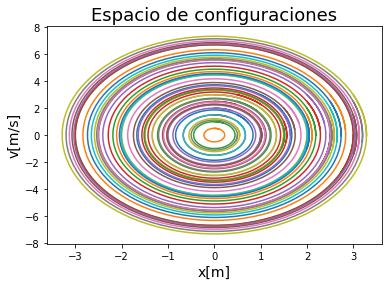

In [502]:
# Ciclo para variar las condiciones iniciales del sistema 
for i in np.linspace(0,3,7):
  for k in np.linspace(0,3,7): 
    U0 = [i, k]
    t= np.linspace(0, 3, 100)
    Us = integrate.odeint(dU_dx, U0, t)
    xs = Us[:,0]
    vs=Us[:,1]

    plt.plot(xs,vs)
    plt.title('Espacio de configuraciones', size=18)
    plt.xlabel('x[m]', size=14)
    plt.ylabel('v[m/s]', size=14)
  

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [503]:
df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


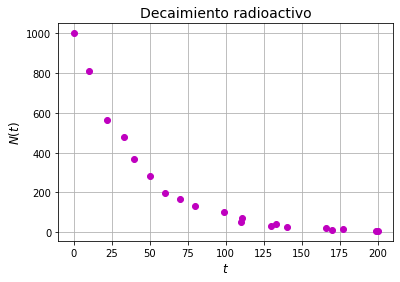

In [504]:
t=df['t']
N = df['N(t)']
plt.plot(t,N,'mo')
plt.title('Decaimiento radioactivo', size=14)
plt.xlabel('$t$', size=12)
plt.ylabel('$N(t)$', size=12)
plt.grid()


(a) Realice un fit a los datos y determine la vida media con su respectivo error.

In [505]:
# Definino la función 
def deca(t, N_0, 𝜆, b):
    return N_0 * np.exp(-𝜆*t) + b
    
y = N
# curve fit
p0 = (1000,1.e-5,1)
popt, pcov = curve_fit(deca, t, y, p0)
N_0, 𝜆, b = popt

In [506]:
perr = np.sqrt(np.diag(pcov))
error=perr[1] 
popt[1]=𝜆
𝜏 = np.log(2)/𝜆
print(f'vida media = {𝜏}')
print(f'error = {error}')

vida media = 27.64350639074006
error = 0.0006867915384744743


La vida media del Strontium-90 es $27.6435 ± 0.0007$ años

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

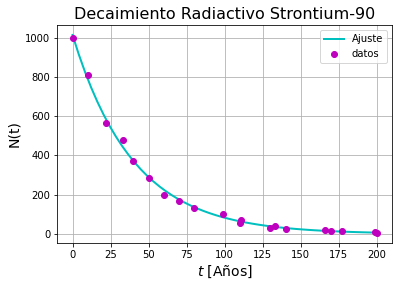

In [507]:
t2 = np.linspace(0, 200)
y2 = deca(t2, N_0, 𝜆, b)

plt.plot(t2, y2, color='c', linewidth=2, label= 'Ajuste')
plt.plot(t, y, 'mo', label='datos')
plt.title( "Decaimiento Radiactivo Strontium-90", fontsize=16 )
plt.xlabel('$t$ [Años]', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.grid()
plt.legend()

plt.show()